In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
import pandas as pd

# Access the data and target arrays
iris_data = iris.data
iris_target = iris.target

# Convert data to DataFrame
df_data = pd.DataFrame(iris_data, columns=iris.feature_names)

# Convert target to Series
df_target = pd.Series(iris_target, name='species')

# Concatenate DataFrame and Series
df = pd.concat([df_data, df_target], axis=1)

# Display the first 5 rows
display(df.head())

# Check for missing values
display(df.isnull().sum())

# Display data types
display(df.info())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None

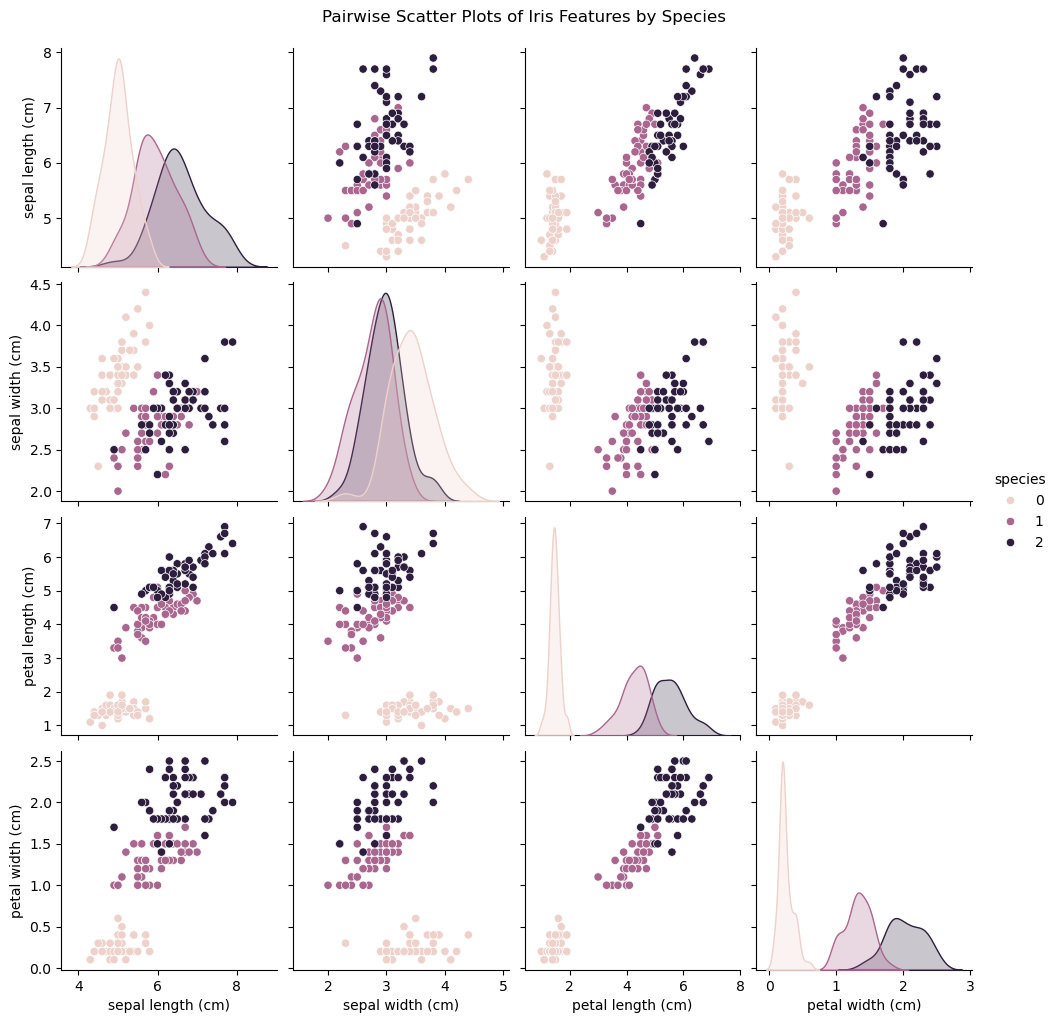

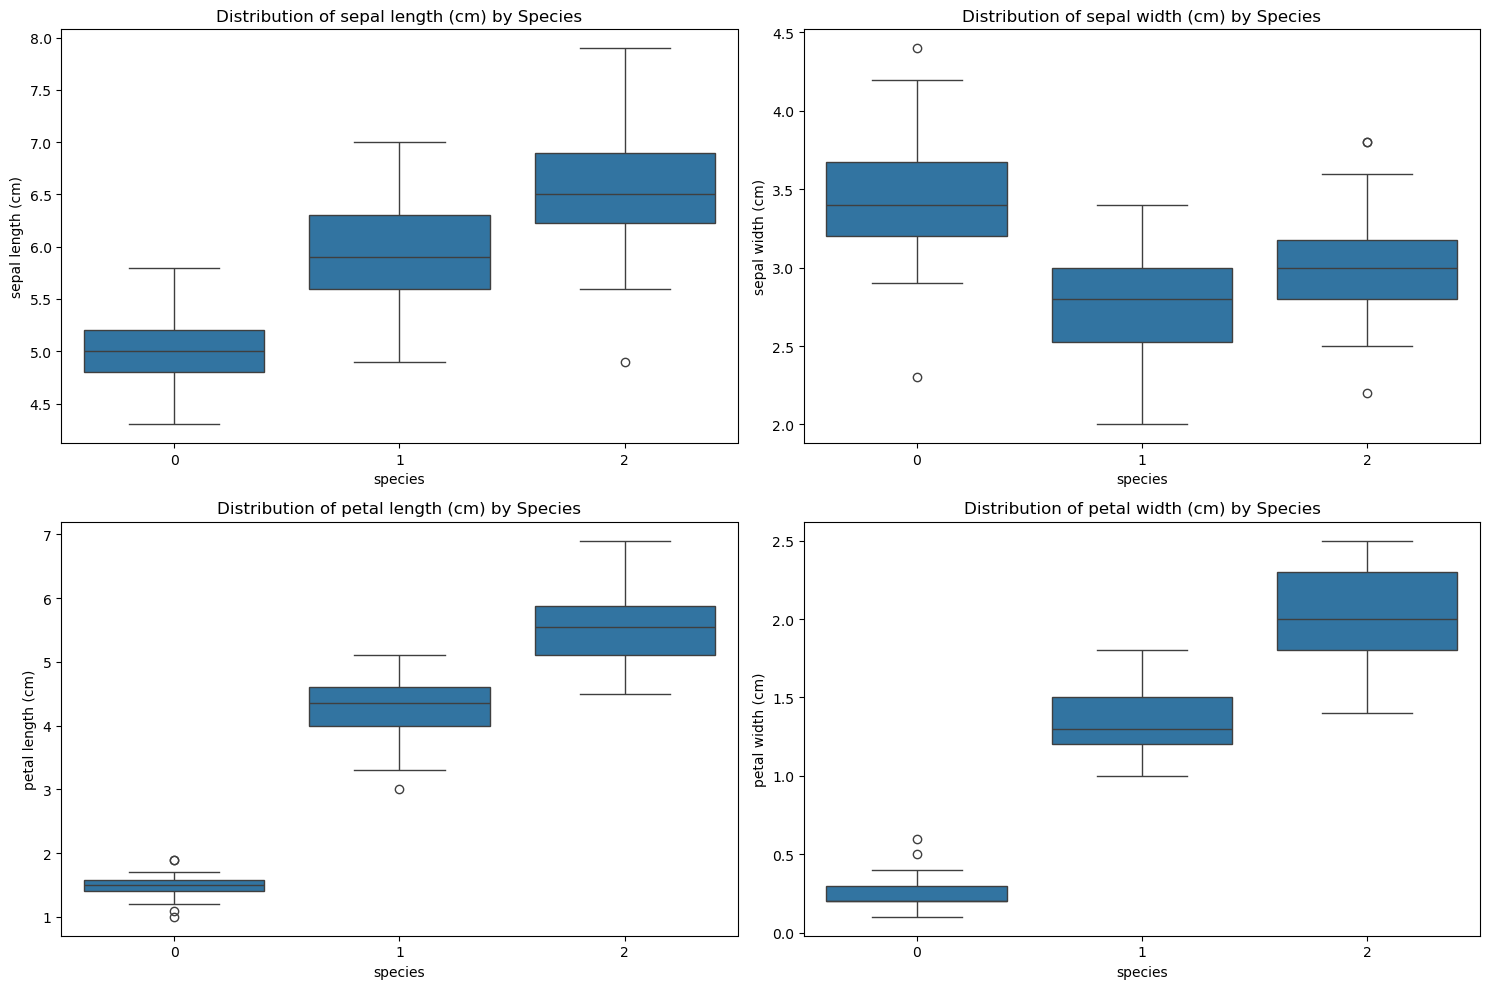

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plots for each pair of features, coloring by species
sns.pairplot(df, hue='species')
plt.suptitle('Pairwise Scatter Plots of Iris Features by Species', y=1.02)
plt.show()

# Create box plots for each feature by species
features = df_data.columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Species')
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X = df_data
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Instantiate models with default parameters
log_reg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svc_model = SVC()

# Train each model using the training data
log_reg_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("K-Nearest Neighbors model trained.")
print("Support Vector Machine model trained.")

Logistic Regression model trained.
K-Nearest Neighbors model trained.
Support Vector Machine model trained.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
log_reg_pred = log_reg_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

# Evaluate Logistic Regression
print("--- Logistic Regression Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred):.4f}")
print(f"Precision: {precision_score(y_test, log_reg_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, log_reg_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, log_reg_pred, average='weighted'):.4f}")

# Evaluate K-Nearest Neighbors
print("\n--- K-Nearest Neighbors Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(f"Precision: {precision_score(y_test, knn_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, knn_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, knn_pred, average='weighted'):.4f}")

# Evaluate Support Vector Machine
print("\n--- Support Vector Machine Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, svc_pred):.4f}")
print(f"Precision: {precision_score(y_test, svc_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, svc_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, svc_pred, average='weighted'):.4f}")

--- Logistic Regression Metrics ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

--- K-Nearest Neighbors Metrics ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

--- Support Vector Machine Metrics ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [7]:
import numpy as np
import pandas as pd

# Create new data points
new_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Example of setosa
                     [6.0, 2.9, 4.5, 1.5],  # Example of versicolor
                     [6.7, 3.0, 5.2, 2.3]]) # Example of virginica

# Convert to DataFrame for consistency with training data format
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)

# Make predictions using one or more trained models (e.g., Logistic Regression)
log_reg_predictions = log_reg_model.predict(new_data_df)
knn_predictions = knn_model.predict(new_data_df)
svc_predictions = svc_model.predict(new_data_df)


# Print the new data and predictions
print("New Data:")
display(new_data_df)

print("\nLogistic Regression Predictions:")
print(log_reg_predictions)

print("\nK-Nearest Neighbors Predictions:")
print(knn_predictions)

print("\nSupport Vector Machine Predictions:")
print(svc_predictions)

New Data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,6.0,2.9,4.5,1.5
2,6.7,3.0,5.2,2.3



Logistic Regression Predictions:
[0 1 2]

K-Nearest Neighbors Predictions:
[0 1 2]

Support Vector Machine Predictions:
[0 1 2]
